## Opinet - 셀프주유소가 정말 저렴할까?

In [42]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

##### 1. 셀레니움으로 서울시 구별 주유소 가격정보 얻기

In [43]:
# Opinet 초기화면 > 싼 주유소 찾기 > 지역별
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [44]:
# 광역시도에서 서울 입력
metro = driver.find_element(By.ID, 'SIDO_NM0')
metro.send_keys('서울')

In [45]:
# 서울시 자치구 리스트 가져오기
sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="79b85bb820bfe27e1352226f862734fc", element="9963F7CF2DC0A26F565DA98F40AF42A5_element_97")>,
 <selenium.webdriver.remote.webelement.WebElement (session="79b85bb820bfe27e1352226f862734fc", element="9963F7CF2DC0A26F565DA98F40AF42A5_element_99")>,
 <selenium.webdriver.remote.webelement.WebElement (session="79b85bb820bfe27e1352226f862734fc", element="9963F7CF2DC0A26F565DA98F40AF42A5_element_101")>]

In [46]:
gu_list[0].text, gu_list[1].text

('시/군/구', '강남구')

In [47]:
gu_names = [ gu.text for gu in gu_list[1:]]
gu_names[:3]

['강남구', '강동구', '강북구']

In [48]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [49]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()

In [50]:
# 강남구를 제외한 나머지 자치구에 대해서 주유소 가격정보 엑셀 저장
for gu in gu_names[1:]:
    sigungu = driver.find_element(By.ID, 'SIGUNGU_NM0')
    sigungu.send_keys(gu)
    time.sleep(4)
    driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(4)

In [51]:
driver.close()

##### 2. 구별 휘발유 가격에 대한 정리

In [52]:
from glob import glob
glob('c:/Users/human/Downloads/지역*.xls')

['c:/Users/human/Downloads\\지역_위치별(주유소) (1).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (10).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (11).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (12).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (13).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (14).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (15).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (16).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (17).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (18).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (19).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (2).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (20).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (21).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (22).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (23).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (24).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (3).xls',
 'c:/Users/human/Downloads\\지역_위치별(주유소) (4).xls',
 'c:/Users/human/Downloads\\지역_위치별(

In [53]:
# conda activate base; pip install xlrd
filename = 'c:/Users/human/Downloads/지역_위치별(주유소).xls'
df = pd.read_excel(filename, header=2)
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1769,1668,-
1,서울특별시,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1978,1788,1688,-
2,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,2025,1795,1735,-


In [54]:
# 25개 파일을 읽어서 하나의 데이터프레임으로 만들기
df_list = []
for filename in glob('c:/Users/human/Downloads/지역*.xls'):
    df = pd.read_excel(filename, header=2)
    df_list.append(df)

In [55]:
df = pd.concat(df_list)
df.shape

(439, 10)

In [56]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스


In [57]:
df.tail()

,상호,주소,가격,셀프,상표
29,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지
30,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [58]:
df['구'] = df.주소.apply(lambda x: x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1779,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1824,N,HD현대오일뱅크,강동구
2,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1835,Y,GS칼텍스,강동구
3,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1836,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1846,N,GS칼텍스,강동구


In [59]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [60]:
df.set_index('상호', inplace=True)
df.reset_index(inplace=True)
df.tail()

,상호,주소,가격,셀프,상표,구
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [61]:
# 가격의 타입 확인
type(df.가격[0])

numpy.int64

In [62]:
df.to_csv('data/opinet_20230919.csv', index=False)
pd.read_csv('data/opinet_20230919.csv').tail()

,상호,주소,가격,셀프,상표,구
434,갤러리아주유소,서울 강남구 압구정로 426,2330,N,SK에너지,강남구
435,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
436,SK논현주유소,서울 강남구 논현로 747 (논현동),2390,N,SK에너지,강남구
437,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
438,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


##### 3. 셀프주유소가 정말 저렴할까?

In [63]:
# 돗수
df.셀프.value_counts()

Y    267
N    172
Name: 셀프, dtype: int64

In [71]:
df.pivot_table('가격', '셀프', aggfunc=['count', 'mean', 'min', 'max', 'std', 'var'])

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
셀프,,,,,,
N,172,1948.372093,1694,2776,217.620387,47358.632667
Y,267,1800.925094,1724,2278,54.626775,2984.084594


- 셀프 여부에 따른 가격의 Boxplot

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

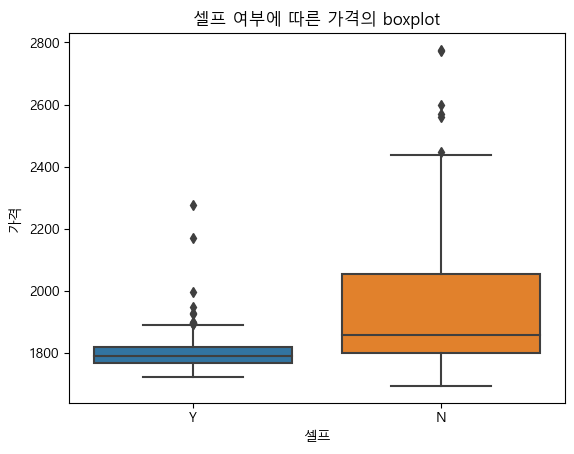

In [70]:
sns.boxplot(df, x='셀프', y='가격')
plt.title('셀프 여부에 따른 가격의 boxplot');

- 가설검정(2-sample T test)

In [72]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프=='Y'].가격, df[df.셀프=='N'].가격, equal_var=False)

Ttest_indResult(statistic=-8.710850568947652, pvalue=1.6733753870177818e-15)

In [73]:
# p-value가 0.05보다 훨씬 작으므로 귀무가설 기각, 대립가설 채택
#   - 귀무가설(H0): 셀프주유소와 일반주유소의 가격 차이가 없다.
#   - 대립가설(H1): 셀프주유소와 일반주유소의 가격 차이가 있다

- 상표별로 가격 비교하기

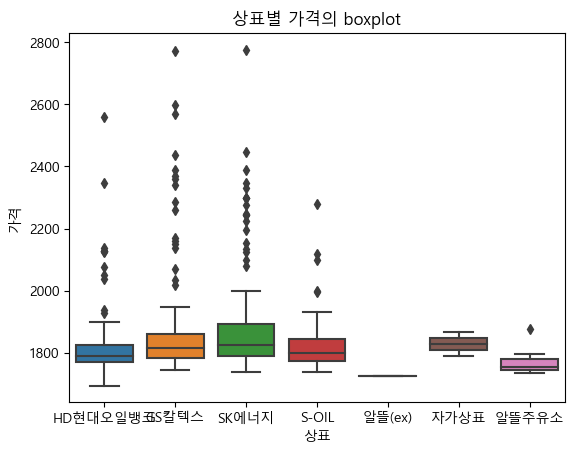

In [75]:
sns.boxplot(df, x='상표', y='가격')
plt.title('상표별 가격의 boxplot');

In [84]:
df.pivot_table('가격', '상표', aggfunc=['mean'])

,mean
,가격
상표,
GS칼텍스,1888.116505
HD현대오일뱅크,1825.982759
S-OIL,1827.141026
SK에너지,1892.116279
알뜰(ex),1724.000000
알뜰주유소,1769.700000
자가상표,1828.000000


In [98]:
df_name_mean = df.pivot_table('가격', '상표').sort_values('가격', ascending=False)
df_name_mean = df_name_mean.round(2)
df_name_mean

,가격
상표,
SK에너지,1892.12
GS칼텍스,1888.12
자가상표,1828.00
S-OIL,1827.14
HD현대오일뱅크,1825.98
알뜰주유소,1769.70
알뜰(ex),1724.00


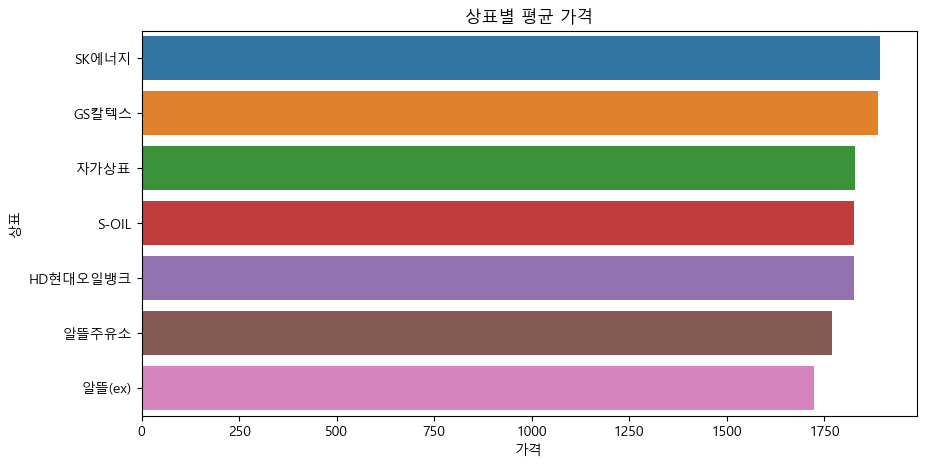

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_name_mean, y=df_name_mean.index, x='가격')
plt.title('상표별 평균 가격')
plt.show()

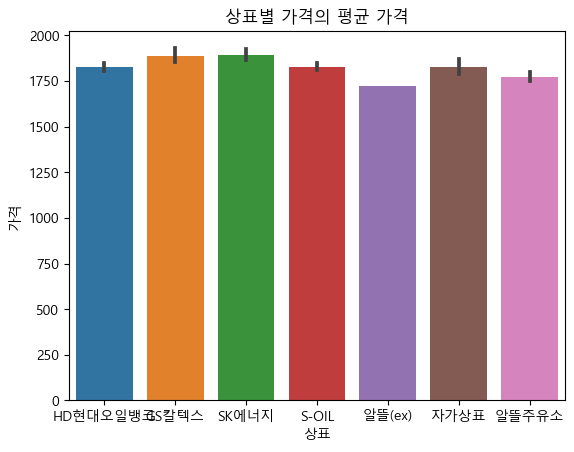

In [81]:
# 상표별 평균 가격의 막대 그래프
sns.barplot(df,  y='가격', x='상표')
plt.title('상표별 가격의 평균 가격');

In [85]:
# 구별 가격 비교
df.pivot_table('가격', '구', aggfunc=['count', 'mean', 'min', 'max', 'std', 'var']).head()

,count,mean,min,max,std,var
,가격,가격,가격,가격,가격,가격
구,,,,,,
강남구,34,2022.941176,1769,2598,237.095294,56214.178253
강동구,14,1882.500000,1779,2118,90.352940,8163.653846
강북구,12,1784.666667,1764,1847,21.943454,481.515152
강서구,33,1811.484848,1735,2133,79.056594,6249.945076
관악구,14,1826.642857,1769,1929,51.324918,2634.247253


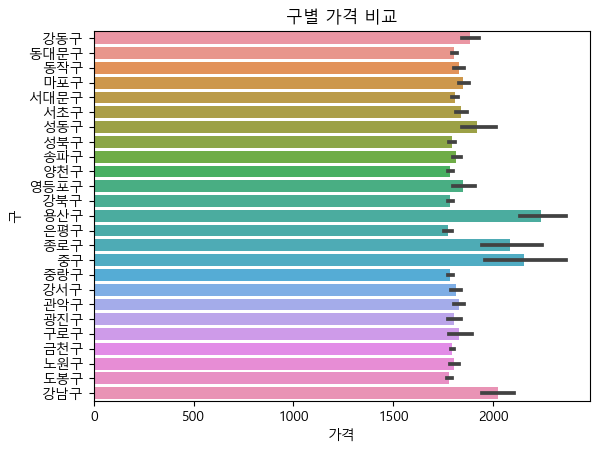

In [90]:
sns.barplot(df,  x='가격', y='구')
plt.title('구별 가격 비교');

In [ ]:
df_sub_mean = df.pivot_table('구독자수', '카테고리').sort_values('구독자수', ascending=False)
df_sub_mean

In [104]:
df_gu_mean = df.pivot_table('가격', '구').sort_values('가격', ascending=False)
df_gu_mean.round(2).head(3)

,가격
구,
용산구,2239.92
중구,2153.30
종로구,2086.22


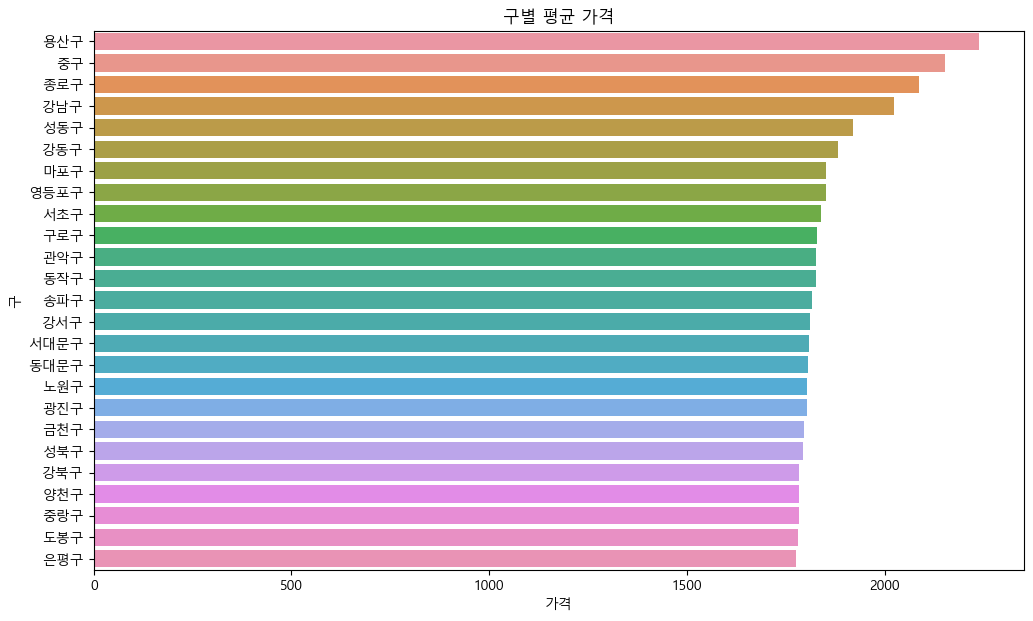

In [105]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_gu_mean, y=df_gu_mean.index, x='가격')
plt.title('구별 평균 가격')
plt.show()